In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
import os
print(os.getcwd())
os.chdir('C:/Users/Cheng/OneDrive/Documents/Proj/VarianceArithemtic')
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb
C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic


In [3]:
df = pd.read_csv("./Python/output/ExpVar.txt", sep='\t')
df.head()

,NoiseType,Noise,X,exp,Error Deviation,Error Minimum,Error Maximum,Value Deviation,Uncertainty,Mean,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,Gaussian,1.0,-100,3.720076e-44,1.031900,-0.455522,26.949909,8.288013e-44,8.031801e-44,2.470983e-44,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901
1,Uniform,1.0,-100,3.720076e-44,0.672664,-0.381224,2.154767,5.402704e-44,8.031801e-44,2.160322e-44,...,0.184982,0.163984,0.146985,0.133487,0.122488,0.087991,0.000000,0.000000,0.000000,0.000000
2,Gaussian,1.0,-50,1.928750e-22,1.031900,-0.455522,26.949909,4.297090e-22,4.164252e-22,1.281132e-22,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901
3,Uniform,1.0,-50,1.928750e-22,0.672664,-0.381224,2.154767,2.801143e-22,4.164252e-22,1.120064e-22,...,0.184982,0.163984,0.146985,0.133487,0.122488,0.087991,0.000000,0.000000,0.000000,0.000000
4,Gaussian,1.0,-20,2.061154e-09,1.031900,-0.455522,26.949909,4.592075e-09,4.450118e-09,1.369078e-09,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901


In [4]:
sorted(df['Noise'].unique())

[1e-16,
 1e-15,
 1e-14,
 1e-13,
 1e-12,
 1e-11,
 1e-10,
 1e-09,
 1e-08,
 1e-07,
 1e-06,
 1e-05,
 0.0001,
 0.001,
 0.01,
 0.1,
 1.0]

In [5]:
sNoise=sorted(df[df['Noise'] > 1e-5]['Noise'].unique())

# Deviation vs Uncertainty

In [6]:
df[(df['X']==0) & (df['Noise'].isin(sNoise))][['NoiseType', 'Noise', 'X', 'Value Deviation', 'Uncertainty', 
                                               'Error Deviation', 'Mean', 'Bias']].head(100)

,NoiseType,Noise,X,Value Deviation,Uncertainty,Error Deviation,Mean,Bias
14,Gaussian,1.0000,0,2.227915,2.159042,1.031900,6.642291e-01,6.486730e-01
15,Uniform,1.0000,0,1.452310,2.159042,0.672664,5.807200e-01,6.486730e-01
44,Gaussian,0.1000,0,0.101106,0.100752,1.003516,5.742691e-03,5.012448e-03
45,Uniform,0.1000,0,0.100411,0.100752,0.996610,5.008508e-03,5.012448e-03
74,Gaussian,0.0100,0,0.010062,0.010001,1.006123,1.669706e-04,5.000053e-05
75,Uniform,0.0100,0,0.010001,0.010001,1.000072,5.001075e-05,5.000053e-05
104,Gaussian,0.0010,0,0.001006,0.001000,1.006218,-7.056736e-06,4.999930e-07
105,Uniform,0.0010,0,0.001000,0.001000,1.000107,5.001001e-07,4.999930e-07
134,Gaussian,0.0001,0,0.000100,0.000100,0.995483,-4.475613e-07,4.999928e-09
135,Uniform,0.0001,0,0.000100,0.000100,1.000107,5.001000e-09,4.999928e-09


In [7]:
def PlotValues( sValue=['Value Deviation', 'Uncertainty'], 
                sNoise=sNoise, noiseType='Gaussian',
                sStyle=['+', '-', '--', 'x'], sColor = ['r','g','b','y','c','m'],
                logx=False, logy=True, xlim=[-10, 10], ylim=[1e-9, 1e+5], bbox=(1.15, 1.0)):
    fig, ax = plt.subplots()
    if logx:
        ax.set_xscale('log')
    if xlim:
        ax.set_xlim(xlim)
    if logy:
        ax.set_yscale('log')
    if ylim:
        ax.set_ylim(ylim)
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_ylabel(' or '.join(sValue))
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        for value, style in zip(sValue, sStyle):
            dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise) ]
            if dfPlot.empty:
                continue
            ax.plot(dfPlot['X'], dfPlot[value], ''.join([color, style]), label=f'{noise} {value}', markersize=10)
    ax.legend(bbox_to_anchor=bbox)

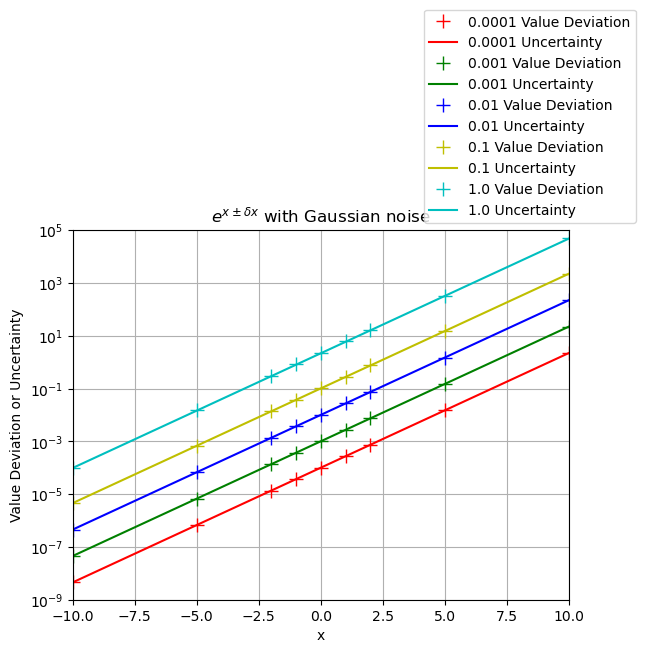

In [8]:
PlotValues()

In [36]:
def PlotErrorDev( noiseType='Gaussian', sNoise=sNoise,
                  sColor=['r','g','b','y','c','m'], xlim=(-10, 10), ylim=(1e-9, 1e5) ):
    
    fig, ax = plt.subplots()
    ax.set_title(r'$e^{x \pm \delta x}$ with ' + noiseType + ' noise')
    ax.set_xlabel('x')
    ax.set_xlim(xlim)
    ax.set_ylabel('Uncertainty or Value Deviation')
    ax.set_yscale('log')
    ax.set_ylim(ylim)
    plt.grid(True)
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax.plot(dfPlot['X'], dfPlot['Uncertainty'], ''.join([color, '-']), label=f'{noise} Uncertainty')
        ax.plot(dfPlot['X'], dfPlot['Value Deviation'], ''.join([color, 'x']), label=f'{noise} Value Deviation')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    for noise, color in zip(sNoise, sColor):
        dfPlot = df[(df['NoiseType']==noiseType) & (df['Noise']==noise)]
        if dfPlot.empty:
            continue
        ax2.plot(dfPlot['X'], dfPlot['Error Deviation'], ''.join([color, '--']), label=f'{noise} Error Deviation')

    ax.legend(bbox_to_anchor=(1.4, 1.0))
    ax2.legend(bbox_to_anchor=(1.6, 0.25))

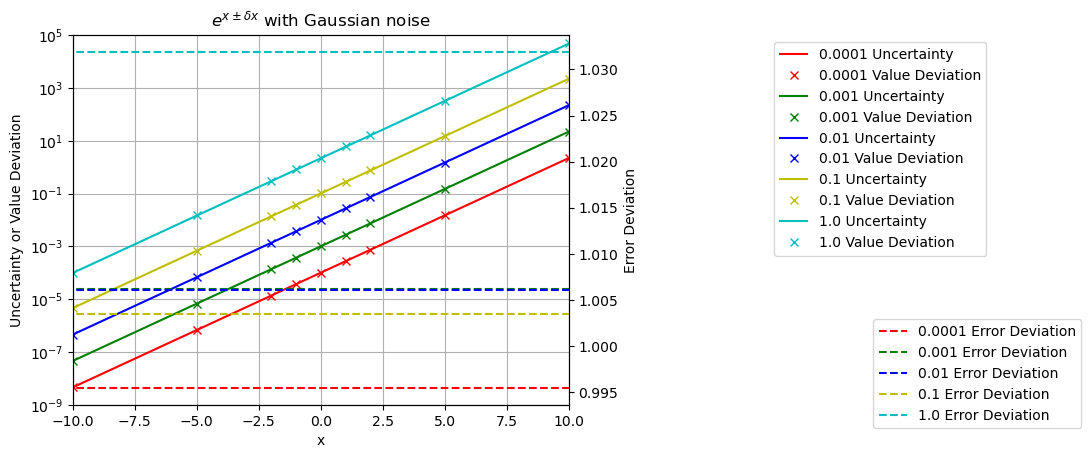

In [37]:
PlotErrorDev()

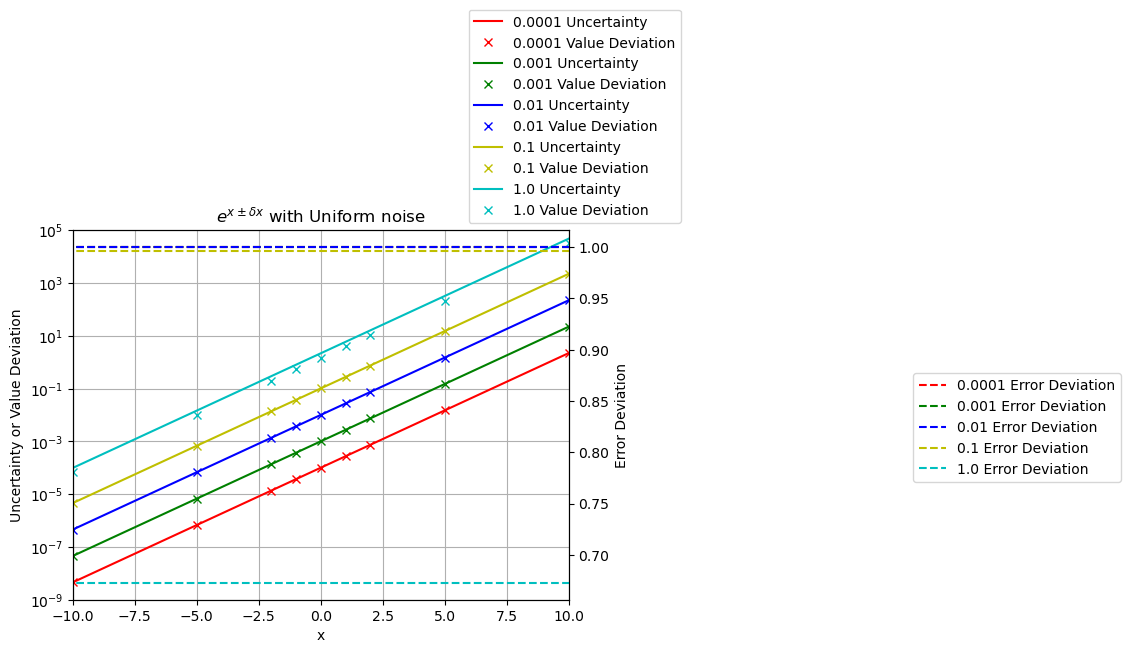

In [11]:
PlotErrorDev('Uniform')

# Mean vs Bias

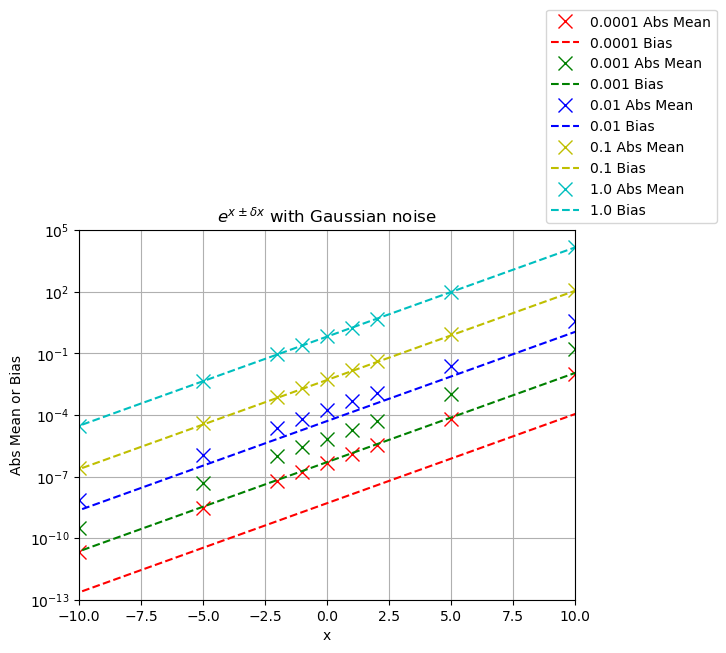

In [12]:
df['Abs Mean'] = abs(df['Mean'])
PlotValues(sValue=['Abs Mean', 'Bias'], sStyle=['x', '--'], ylim=[1e-13, 1e+5], bbox=(1.3, 1.0))

# Error Maximum and Minimum

# Histogram

In [13]:
sHisto = [str(i/10) for i in range(-29, 30, 2)]
df[sHisto].head()

,-2.9,-2.7,-2.5,-2.3,-2.1,-1.9,-1.7,-1.5,-1.3,-1.1,...,1.1,1.3,1.5,1.7,1.9,2.1,2.3,2.5,2.7,2.9
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184982,0.163984,0.146985,0.133487,0.122488,0.087991,0.000000,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.184982,0.163984,0.146985,0.133487,0.122488,0.087991,0.000000,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.122238,0.104337,0.084902,0.052169,0.044497,0.042962,0.037848,0.024038,0.017901,0.017901


In [14]:
def PlotHisto( sNoiseType=['Uniform'], sNoise=df['Noise'].unique(), sX=df['X'].unique() ):
    df['algo'] = df['NoiseType'] + " " + df['Noise'].astype(str) + " " + df['X'].astype(str)
    dfPlot = df[(df['NoiseType'].isin(sNoiseType)) & (df['Noise'].isin(sNoise)) & (df['X'].isin(sX))].set_index('algo')
    # return dfPlot
    ax = dfPlot[sHisto].T.plot()
    ax.legend(bbox_to_anchor=(1.1, 1.05))    


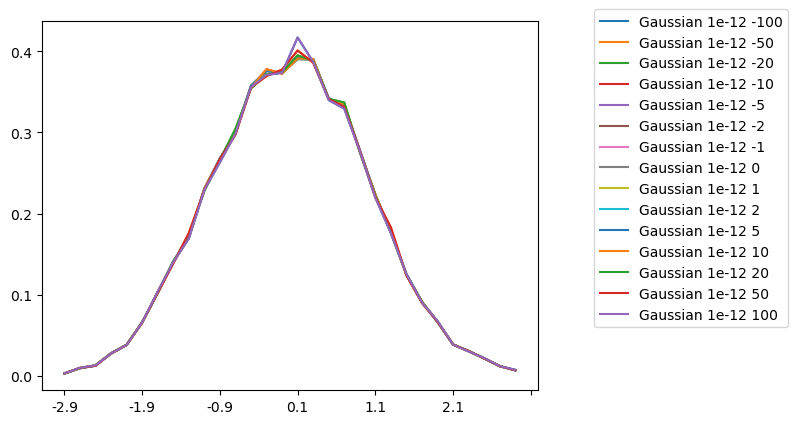

In [15]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])

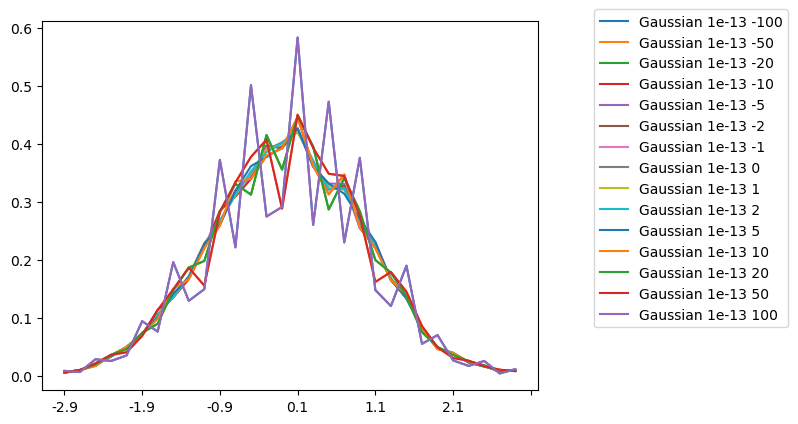

In [16]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-13])

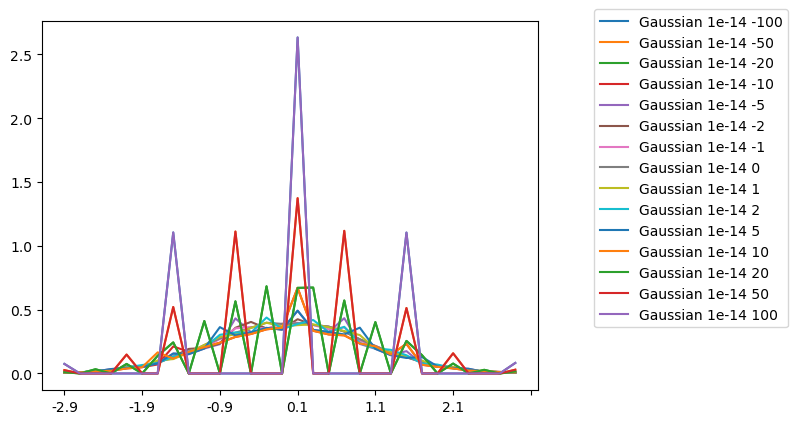

In [17]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-14])

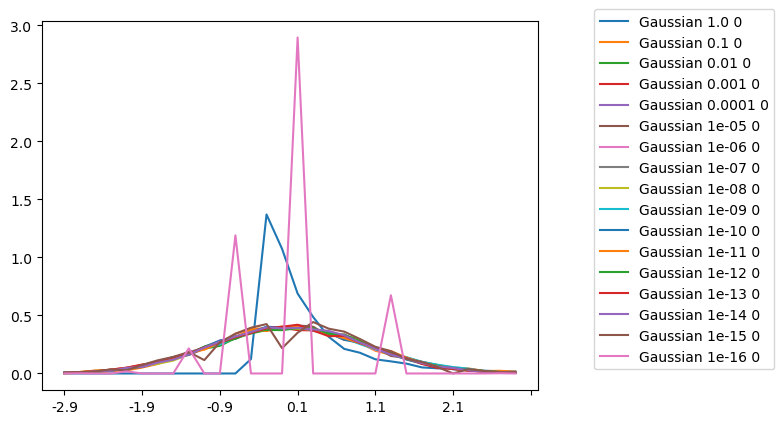

In [18]:
PlotHisto(sNoiseType=['Gaussian'], sX=[0])

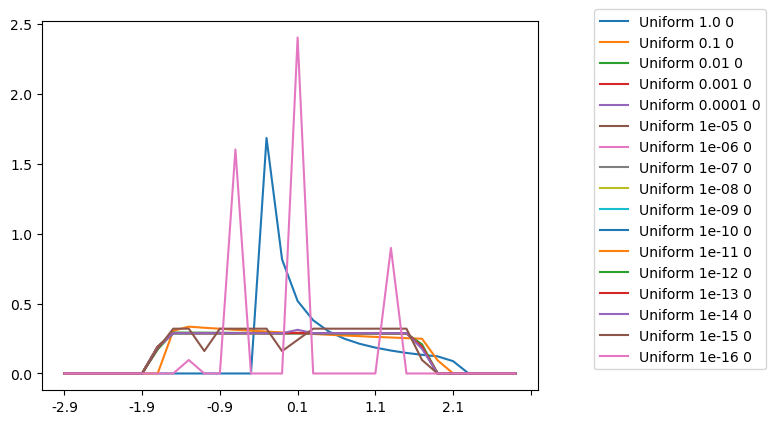

In [19]:
PlotHisto(sNoiseType=['Uniform'], sX=[0])

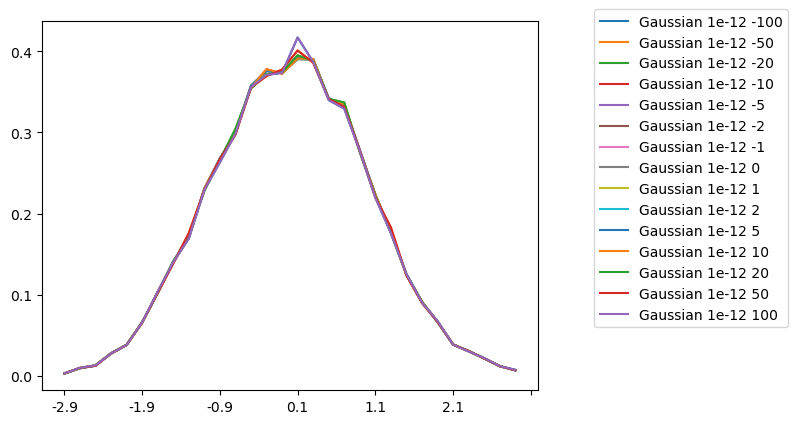

In [20]:
PlotHisto(sNoiseType=['Gaussian'], sNoise=[1e-12])